In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# gate_30 - A group
# gate_40 - B group

In [5]:
# Let's make A\A test. If our set isn't representative, so A\B test results can be incorrect.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
A_1, A_2 = train_test_split(df[df.version == 'gate_30'], test_size = 0.5, random_state = 42)

In [8]:
print('RETENTION_1  (A_1 set)\n\n')
print('COUNT:\n', A_1.version.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', A_1.retention_1.value_counts(), end = '\n\n\n')

RETENTION_1  (A_1 set)


COUNT:
 22350


VALUES COUNTS:
 False    12330
True     10020
Name: retention_1, dtype: int64




In [9]:
print('RETENTION_1   (A_2 set)\n\n')
print('COUNT:\n', A_2.version.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', A_2.retention_1.value_counts(), end = '\n\n\n')

RETENTION_1   (A_2 set)


COUNT:
 22350


VALUES COUNTS:
 False    12336
True     10014
Name: retention_1, dtype: int64




In [10]:
# I use abtestguide.com/calc/ resourse

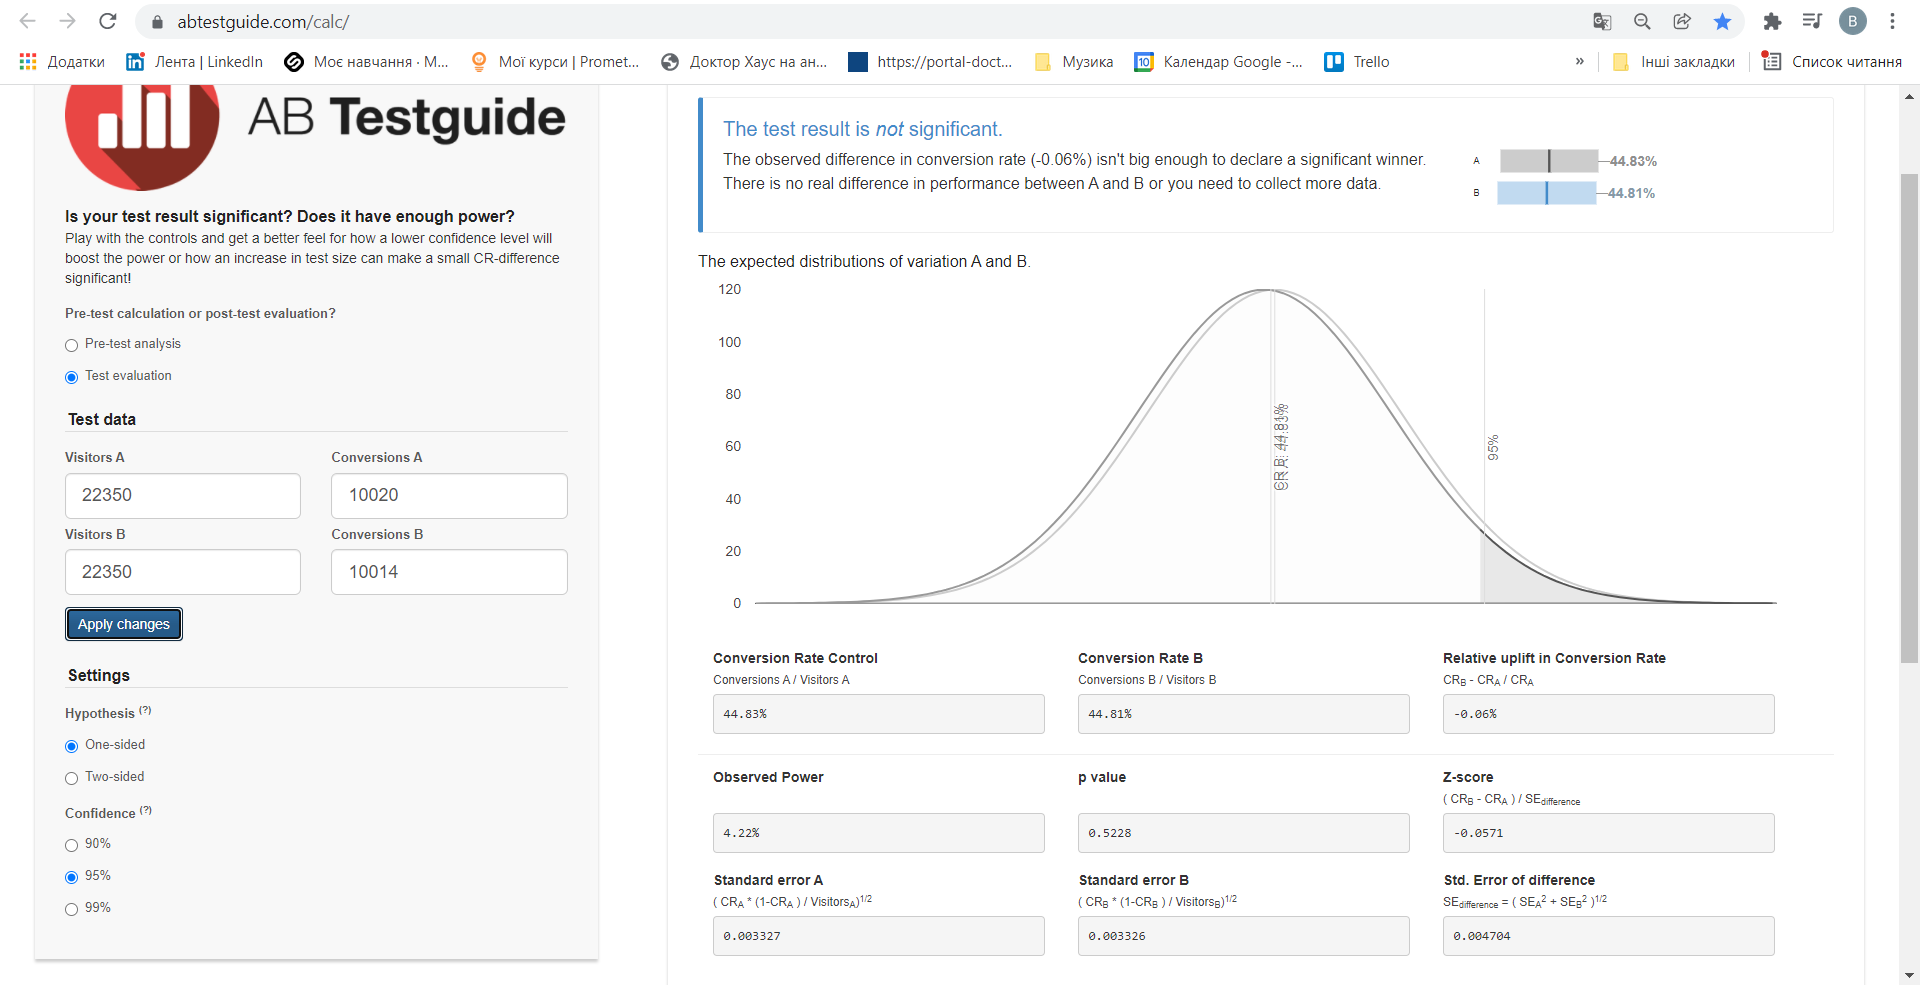

In [11]:
# So we can see, that there aren't difference. Can make A\B test now.

In [12]:
print('COUNT:\n', df.groupby('version').retention_1.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', df.groupby('version').retention_1.value_counts(), end = '\n\n\n')

COUNT:
 version
gate_30    44700
gate_40    45489
Name: retention_1, dtype: int64


VALUES COUNTS:
 version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
Name: retention_1, dtype: int64




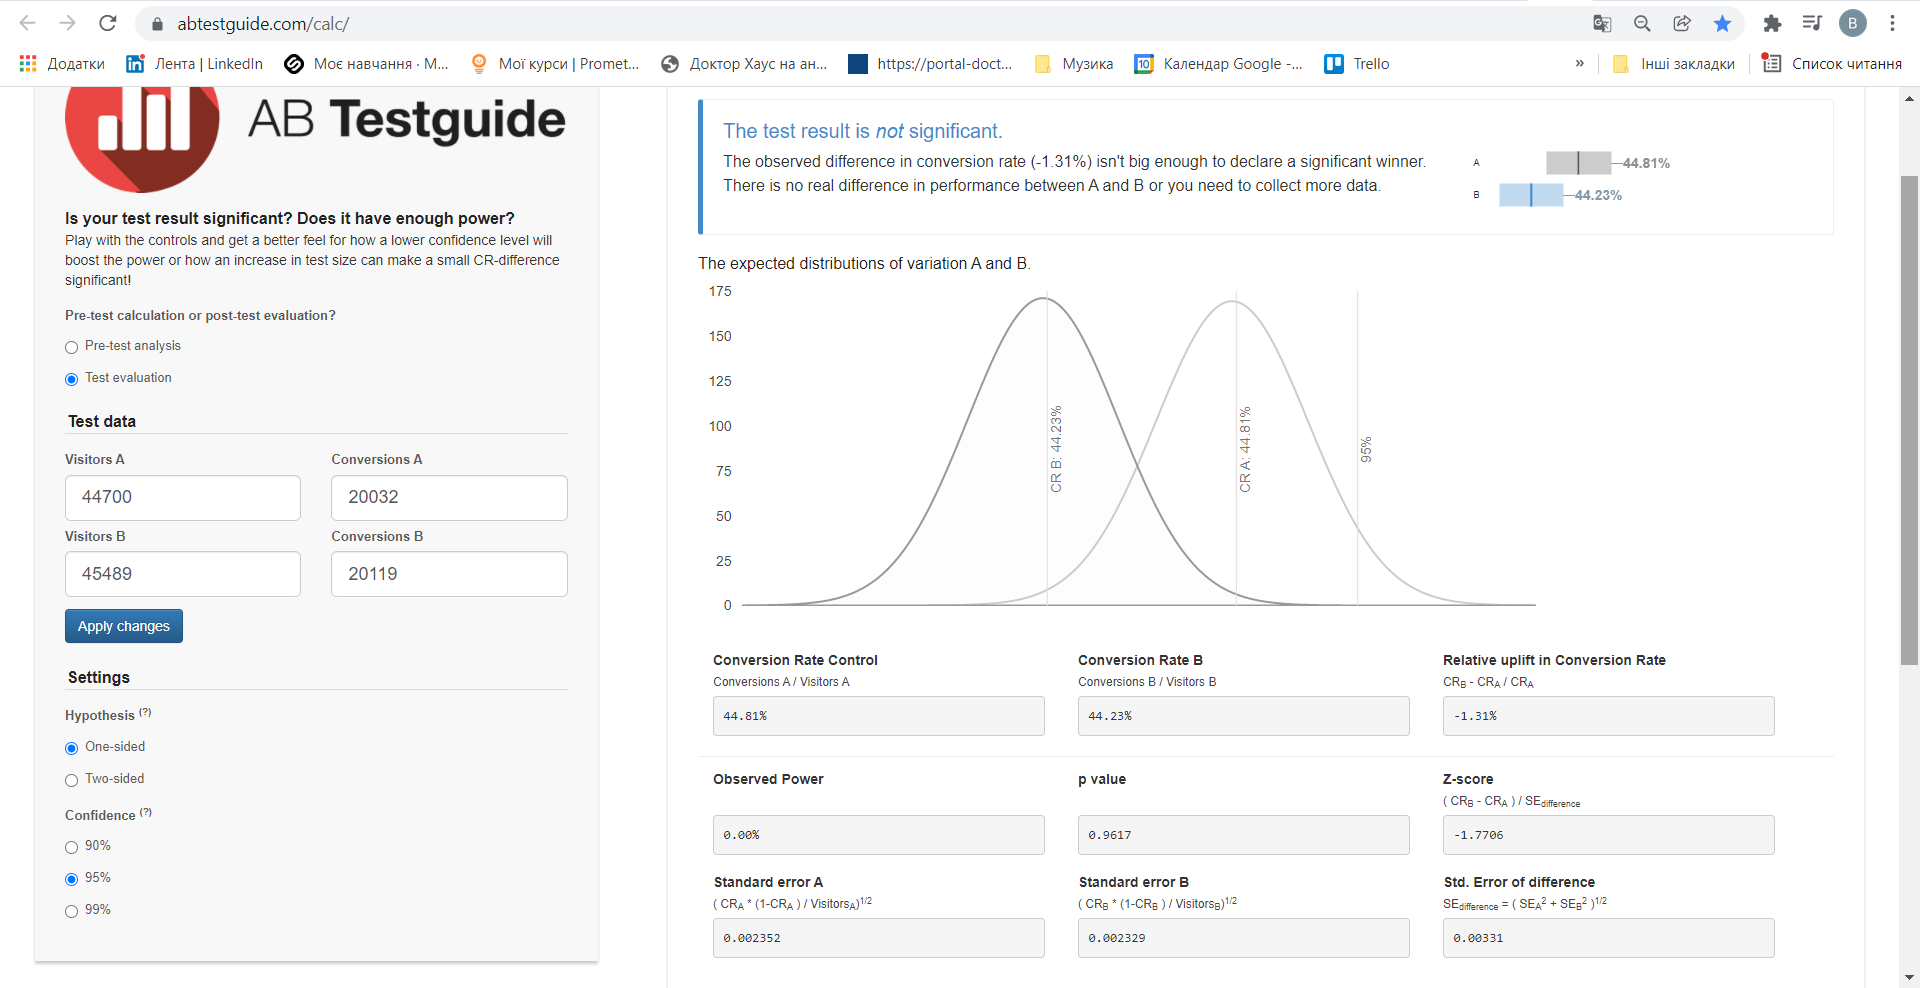

In [13]:
# Test result for retention_1 shows that there aren't statistically significant difference for retention_1

In [14]:
# But situation with retention_7 can be another. Let's check this one.

In [15]:
# A\A test for retention_7

In [16]:
print('RETENTION_1  (A_1 set)\n\n')
print('COUNT:\n', A_1.version.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', A_1.retention_7.value_counts(), end = '\n\n\n')

RETENTION_1  (A_1 set)


COUNT:
 22350


VALUES COUNTS:
 False    18171
True      4179
Name: retention_7, dtype: int64




In [17]:
print('RETENTION_1   (A_2 set)\n\n')
print('COUNT:\n', A_2.version.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', A_2.retention_7.value_counts(), end = '\n\n\n')

RETENTION_1   (A_2 set)


COUNT:
 22350


VALUES COUNTS:
 False    18027
True      4323
Name: retention_7, dtype: int64




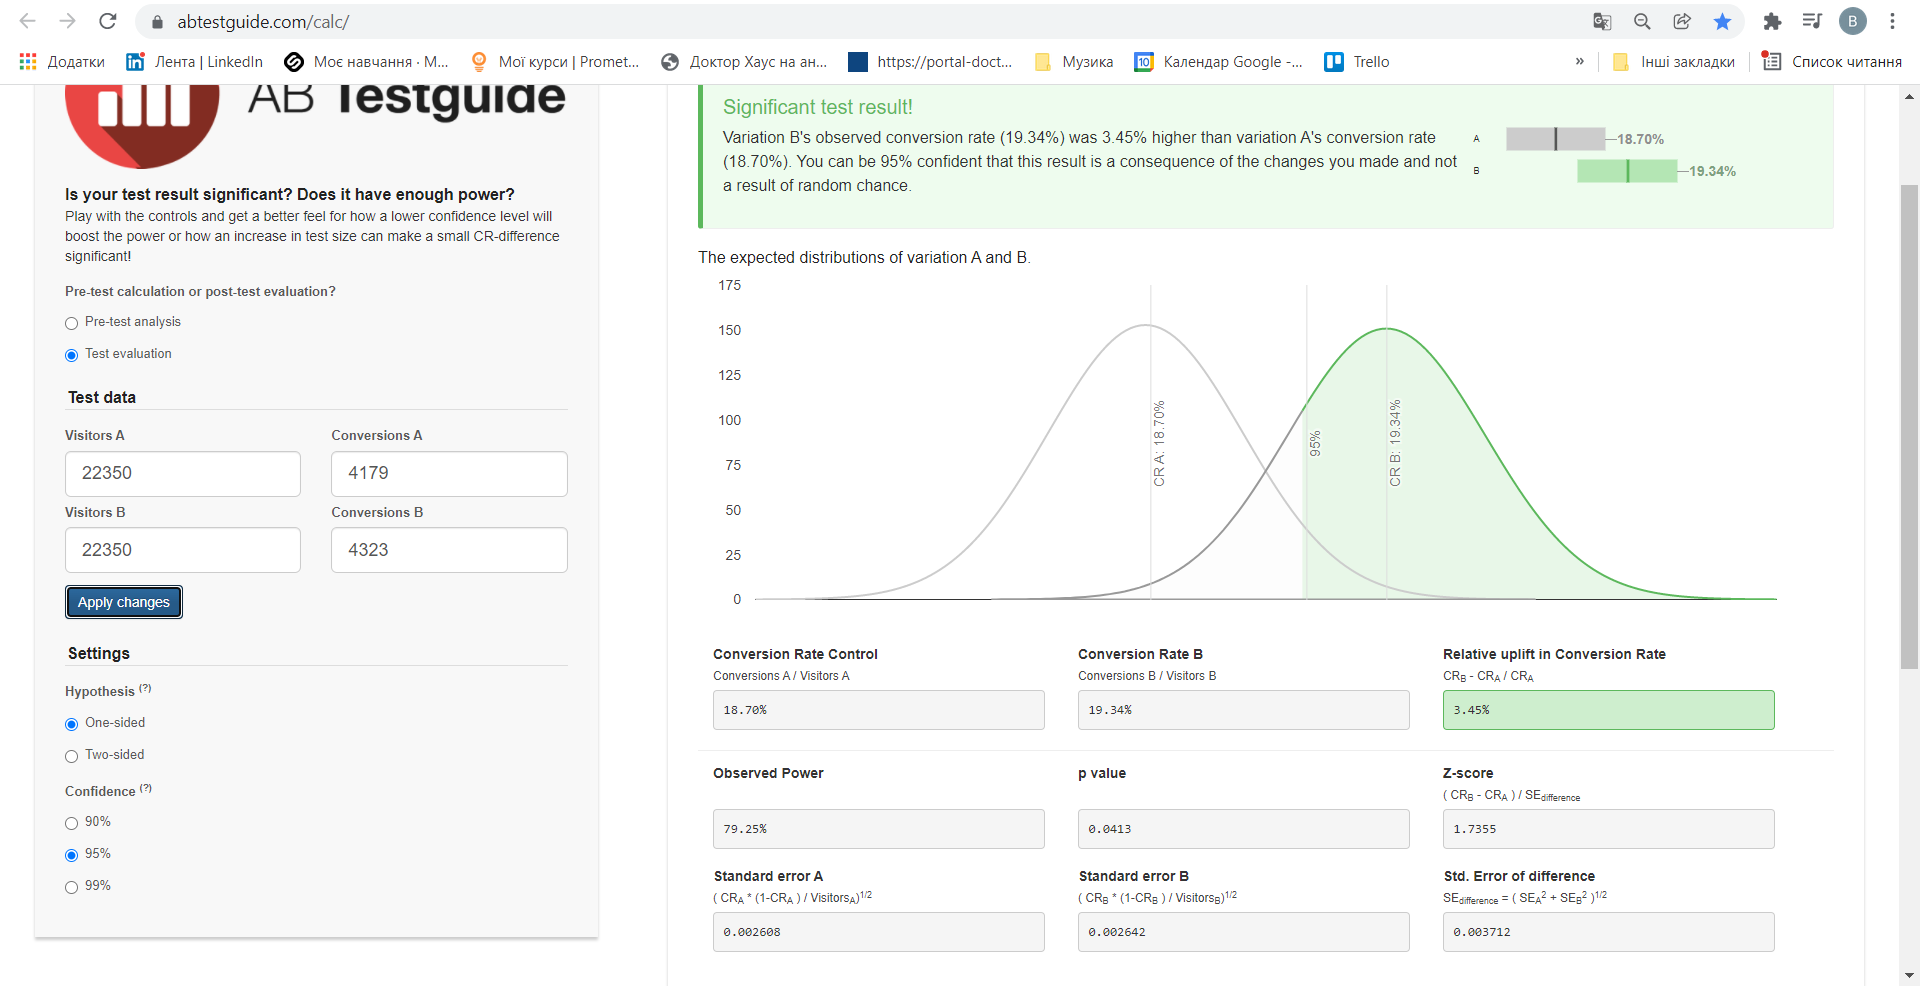

In [18]:
# Test shows us that there is statistically significant difference between A_1 and A_2. So result of A\B testing can be incorrect.

In [19]:
# It means that there are some groups what weren't considered. I can't do anything with it, because haven't any features.

In [20]:
# This groups can look like (mobile-desktop users, age/nationality/gender groups etc.)

In [21]:
# But anyway I will check A\B test.

In [22]:
print('COUNT:\n', df.groupby('version').retention_7.count(), end = '\n\n\n')
print('VALUES COUNTS:\n', df.groupby('version').retention_7.value_counts(), end = '\n\n\n')

COUNT:
 version
gate_30    44700
gate_40    45489
Name: retention_7, dtype: int64


VALUES COUNTS:
 version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
Name: retention_7, dtype: int64




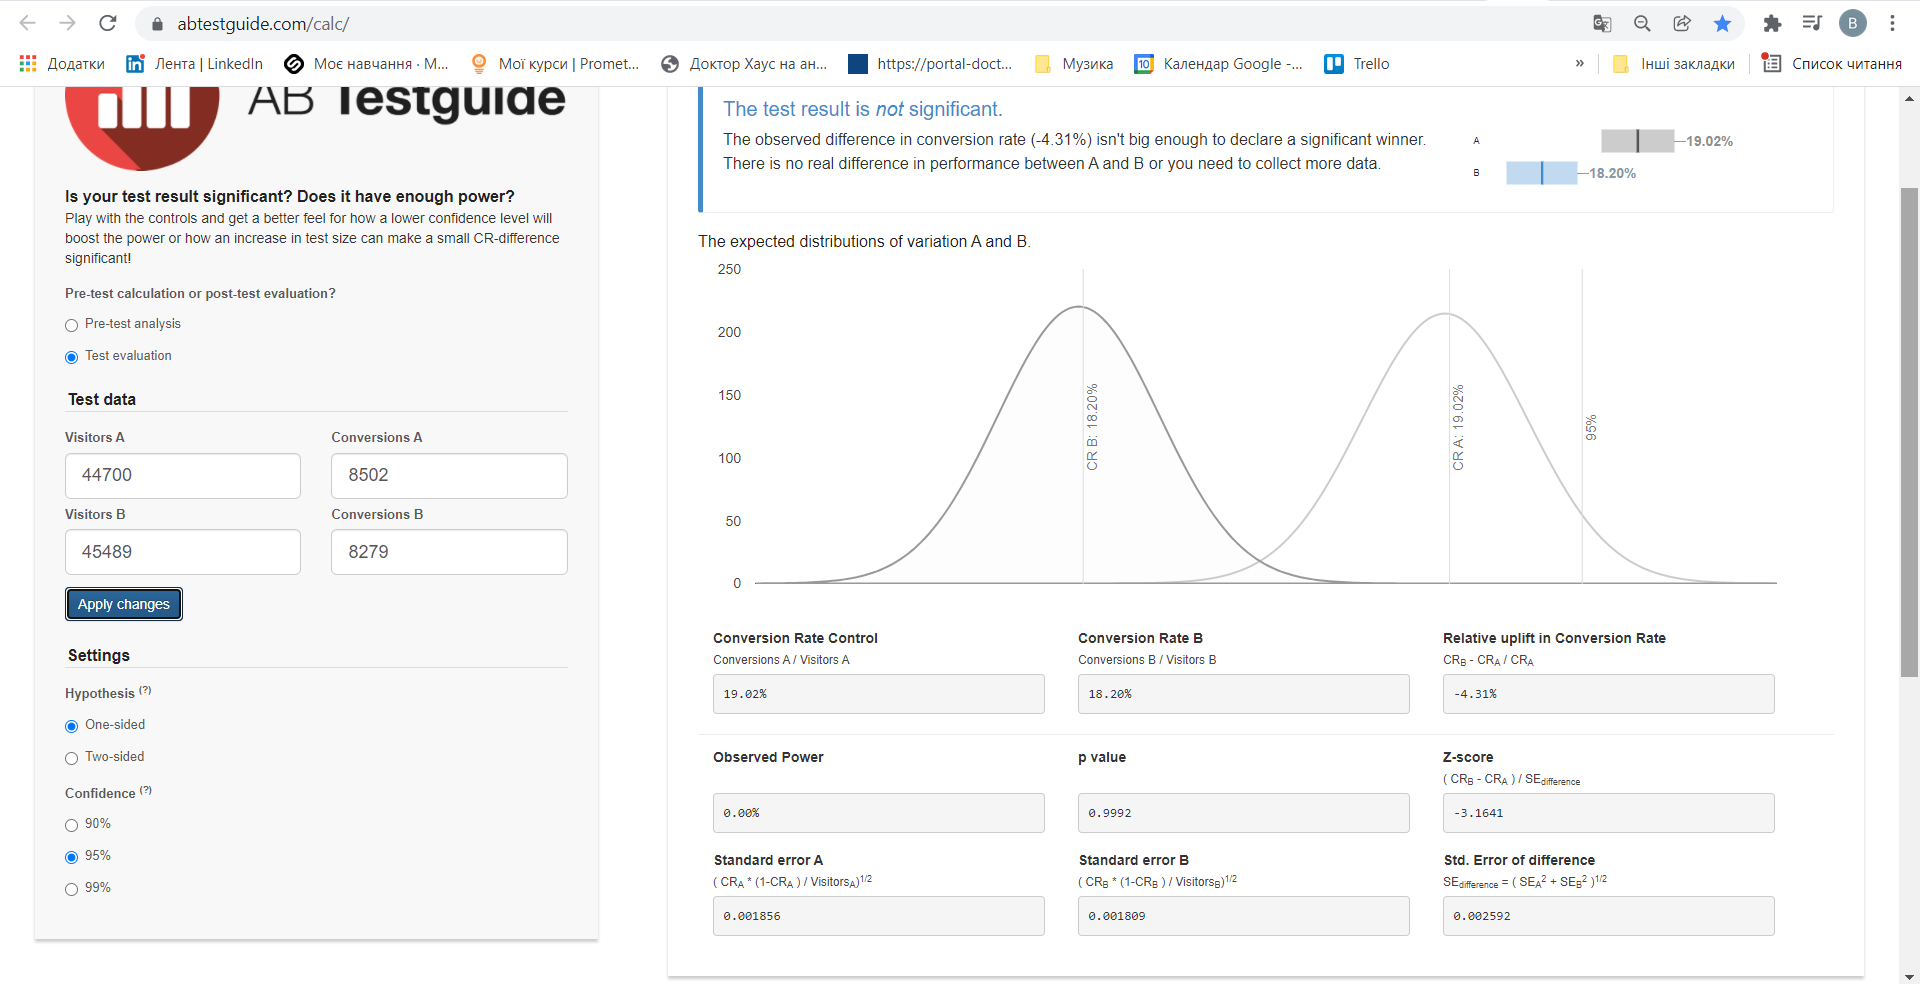

In [23]:
# Okay, this test hasn't shown significant difference between A and B for retention_7

In [24]:
# We can also test 'sum_gameround' feature in A\B test to get more information

In [25]:
df.groupby('version').sum_gamerounds.describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


<AxesSubplot:>

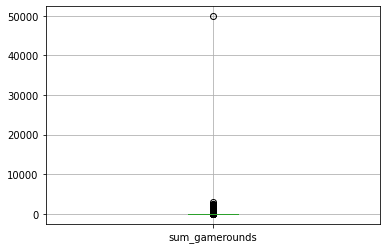

In [26]:
pd.DataFrame(df.sum_gamerounds).boxplot()

In [27]:
# We can see outliers in our data, let's clear it

In [28]:
Q1 = df.sum_gamerounds.quantile(0.25)
Q3 = df.sum_gamerounds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

46.0


In [29]:
df['is_outlier'] = (df.sum_gamerounds < (Q1 - 1.5 * IQR)) | (df.sum_gamerounds > (Q3 + 1.5 * IQR))

In [30]:
df.is_outlier

0        False
1        False
2         True
3        False
4         True
         ...  
90184    False
90185    False
90186    False
90187    False
90188    False
Name: is_outlier, Length: 90189, dtype: bool

In [31]:
df['is_outlier'] = df.is_outlier.astype('int')

In [32]:
df.is_outlier.describe()

count    90189.000000
mean         0.112841
std          0.316400
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_outlier, dtype: float64

In [33]:
df.is_outlier.sum()

10177

In [34]:
# It's real a lot of outliers, like 11.3%, but let's remove them.

In [35]:
df = df[df.is_outlier == 0].drop('is_outlier', axis = 1)

In [36]:
df.sum_gamerounds.describe()

count    80012.000000
mean        23.979178
std         27.481366
min          0.000000
25%          4.000000
50%         13.000000
75%         34.000000
max        120.000000
Name: sum_gamerounds, dtype: float64

In [37]:
# Okay, df is cleared of outliers

<AxesSubplot:>

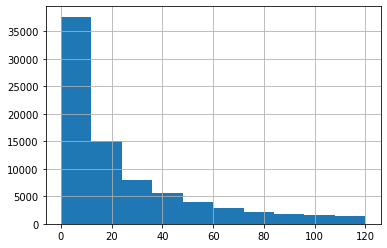

In [38]:
df.sum_gamerounds.hist()

In [39]:
# We can't use anova, because distribution of data insn't gaussian, 

<AxesSubplot:>

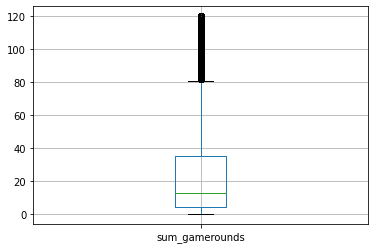

In [40]:
pd.DataFrame(df[df.version == 'gate_30'].sum_gamerounds).boxplot()

<AxesSubplot:>

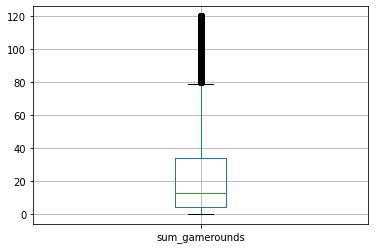

In [41]:
pd.DataFrame(df[df.version == 'gate_40'].sum_gamerounds).boxplot()

In [42]:
# Boxplots of our groups are the same.

In [43]:
df.userid.count()

80012

In [44]:
len(df.userid.unique())

80012

In [45]:
# Oke, our set consits only of unique samples. Than we can use Kruskal-Wallis test

In [46]:
A_group = df[df.version == 'gate_30'].sum_gamerounds
B_group = df[df.version == 'gate_40'].sum_gamerounds
from scipy.stats import kruskal
stat, p = kruskal(A_group, B_group)

In [47]:
stat

4.267192063701985

In [48]:
p

0.03885508703491801

In [49]:
if (p <= 0.05):
    print('H0 - right. Distributions of groups are the same')
else:
    print('H0 - incorrect. Distributions of groups are difference')

H0 - right. Distributions of groups are the same


In [50]:
# p-value < 0.05, so A and B groups is the same in sum_gamerounds

In [51]:
# Also we can try to make normal distribution, remove heteroskedasticity etc. and make more tests.

In [52]:
# But it's clearly nonsense. We had seen that changes in version didn't make retention better or worse.

In [53]:
# And developers need to find another way to improve their game.